In [1]:
import os
import pandas as pd 
import numpy as np 

# Data preprocessors
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# ML Models (will evaluate each and choose)
from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.naive_bayes import GaussianNB # Niave Bayes classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier

# Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAvgPool1D, Dense 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Visualization
import matplotlib.pyplot as plt

# Dumping
import joblib 

In [2]:
# import local module found in another folder
import sys
sys.path.append('../')
from preprocessing import preprocessing_pipeline

In [3]:
# Visualization function

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
# Data extraction function
def extract_data(DATA_PATH):
    files = [file for file in os.listdir(DATA_PATH) if os.path.isfile(os.path.join(DATA_PATH, file))]
    combined_data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(DATA_PATH, file)
        df = pd.read_csv(file_path, delimiter='\t')
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    return combined_data

In [5]:
# Modify the path and extract the data
data_path = '../data/'
data = extract_data(DATA_PATH=data_path)

In [6]:
data = shuffle(data)
data = data.dropna()
data.head()

,headline,content,category,date,link
4481,Piriimayeer liigii Ityoophiyaan Adaamaan Macha...,Taphoota Beetkiingii Piriimayeer liigii Ityo...,ispoortii,2023-04-01,https://www.fanabc.com/afaanoromoo/piriimayeer...
2772,Addunyaarratti lakkoofsi namoota vaayrasii kor...,Addunyaarratti lakkoofsi namoota vaayrasii k...,idil_addunyaa,2020-08-14,https://www.fanabc.com/afaanoromoo/addunyaarra...
3811,Taphoota Beetkiing Priimeyar Liigii Ityoophiya...,Taphoota Beetkiing Priimeyar Liigii Ityoophi...,ispoortii,2020-12-29,https://www.fanabc.com/afaanoromoo/taphoota-be...
3935,Atleet Yalemzarf fiigicha fageenya meetira kum...,Dorgommii fiigicha daandirraa fageenya meeti...,ispoortii,2022-02-27,https://www.fanabc.com/afaanoromoo/atleet-yale...
1411,Qorichoonni tajaajila yaala dhibee Sukkaaraaf ...,Qorichoonni tajaajila yaala dhibee Sukkaaraa...,fayyaa,2021-02-23,https://www.fanabc.com/afaanoromoo/qorichoonni...


In [7]:
preprocessor = preprocessing_pipeline.PreprocessingPipeline()

In [8]:
data['preprocessed_content'] = data['content'].apply(preprocessor.preprocess)

In [9]:
data.head()

,headline,content,category,date,link,preprocessed_content
4481,Piriimayeer liigii Ityoophiyaan Adaamaan Macha...,Taphoota Beetkiingii Piriimayeer liigii Ityo...,ispoortii,2023-04-01,https://www.fanabc.com/afaanoromoo/piriimayeer...,tapho beetkiingii piriimayeer liigii ityoophiy...
2772,Addunyaarratti lakkoofsi namoota vaayrasii kor...,Addunyaarratti lakkoofsi namoota vaayrasii k...,idil_addunyaa,2020-08-14,https://www.fanabc.com/afaanoromoo/addunyaarra...,addunyaarrat lakkoof namo vaayrasii koroona qa...
3811,Taphoota Beetkiing Priimeyar Liigii Ityoophiya...,Taphoota Beetkiing Priimeyar Liigii Ityoophi...,ispoortii,2020-12-29,https://www.fanabc.com/afaanoromoo/taphoota-be...,tapho beetkiing priimeyar liigii ityoophiyaa t...
3935,Atleet Yalemzarf fiigicha fageenya meetira kum...,Dorgommii fiigicha daandirraa fageenya meeti...,ispoortii,2022-02-27,https://www.fanabc.com/afaanoromoo/atleet-yale...,dorgommii fiigicha daandirraa fagee meetira ku...
1411,Qorichoonni tajaajila yaala dhibee Sukkaaraaf ...,Qorichoonni tajaajila yaala dhibee Sukkaaraa...,fayyaa,2021-02-23,https://www.fanabc.com/afaanoromoo/qorichoonni...,qorichoonni tajaajila yaala dhibee sukkaaraa o...


In [10]:
# Convert the labels to numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['category'])

In [11]:
# Split the data int to training, validation and testing sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(data['preprocessed_content'], encoded_labels, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=0)

In [12]:
# Text vectorization using TF-IDF
vectorizor = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizor.fit_transform(X_train)
X_val_vectorized = vectorizor.transform(X_val)
X_test_vectorized = vectorizor.transform(X_test)


## Testing Different Models

### Model 1: Support Vector Machine

In [13]:
classifier_svm = SVC()
classifier_svm.fit(X_train_vectorized, y_train)

SVC()

In [15]:
accuracy_val_svm = classifier_svm.score(X_val_vectorized, y_val)
print("Support Vector Machine ValidationA Accuracy: ", accuracy_val_svm)

Support Vector Machine ValidationA Accuracy:  0.9169776119402985


### Model 2: Naive Bayes Classifier

In [16]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_vectorized.toarray(), y_train)

GaussianNB()

In [17]:
accuracy_val_nb = classifier_nb.score(X_val_vectorized.toarray(), y_val)
print("Naive Bayes Validation Accuracy: ", accuracy_val_nb)

Naive Bayes Validation Accuracy:  0.7826492537313433


### Model 3: RandomForestClassifier

In [18]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [19]:
accuracy_val_rf = classifier_rf.score(X_val_vectorized, y_val)
print("Random Forest Validation Accuracy: ", accuracy_val_rf)

Random Forest Validation Accuracy:  0.8703358208955224


### Model 4: Logistic Regression

In [20]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train_vectorized, y_train)

LogisticRegression()

In [21]:
accuracy_val_lr = classifier_lr.score(X_val_vectorized, y_val)
print("Logistic Regression Validation Accuracy: ", accuracy_val_lr)

Logistic Regression Validation Accuracy:  0.917910447761194


### Model 5: Neural Network Model

In [22]:
# add data length row
data['content_len'] = data['content'].apply(lambda x: len(x.split()))
# now let us calcualte the mean value
mean = np.mean(data['content_len'])
print(mean) # will be used in tokenization

119.66143966547192


In [23]:
# Tokenization
max_length = 150
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

In [28]:
# Build and Train Neural Network Model

model = Sequential(
    [
        Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=16, input_length=max_length),
        GlobalAvgPool1D(),
        Dense(16, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ]
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 16)           593392    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 6)                 102       
                                                                 
Total params: 593766 (2.27 MB)
Trainable params: 593766 (2.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history = model.fit(X_train_padded, y_train, epochs=100, validation_data=(X_val_padded, y_val))

Epoch 1/100


134/134 [==============================] - 2s 10ms/step - loss: 1.7298 - accuracy: 0.2603 - val_loss: 1.6307 - val_accuracy: 0.2668
Epoch 2/100
134/134 [==============================] - 1s 6ms/step - loss: 1.4952 - accuracy: 0.4435 - val_loss: 1.2995 - val_accuracy: 0.7034
Epoch 3/100
134/134 [==============================] - 1s 7ms/step - loss: 1.1287 - accuracy: 0.7225 - val_loss: 0.9501 - val_accuracy: 0.7649
Epoch 4/100
134/134 [==============================] - 1s 6ms/step - loss: 0.8411 - accuracy: 0.7663 - val_loss: 0.7419 - val_accuracy: 0.7985
Epoch 5/100
134/134 [==============================] - 1s 7ms/step - loss: 0.6617 - accuracy: 0.7887 - val_loss: 0.6214 - val_accuracy: 0.8172
Epoch 6/100
134/134 [==============================] - 1s 6ms/step - loss: 0.5337 - accuracy: 0.8364 - val_loss: 0.5391 - val_accuracy: 0.8563
Epoch 7/100
134/134 [==============================] - 1s 6ms/step - loss: 0.4308 - accuracy: 0.8810 - val_loss: 0.4719 - val_accuracy: 0.8703
Epoch 8/10

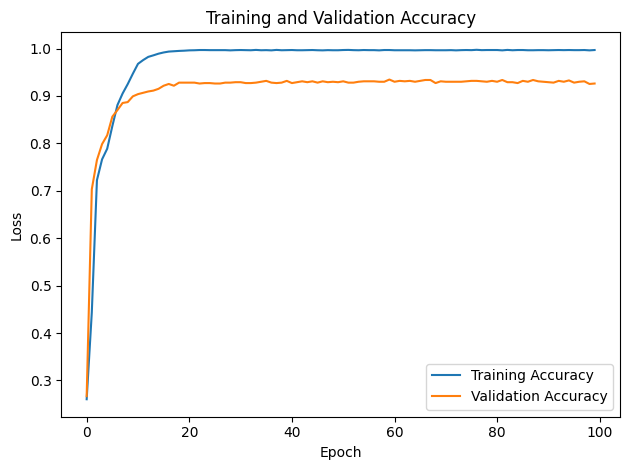

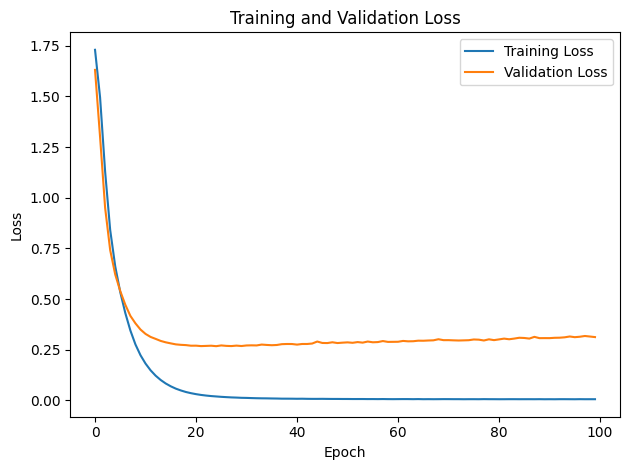

In [30]:
# Evaluate Neural Network Model
plot_accuracy(history)
plot_loss(history)

In [31]:
accuracy_test = model.evaluate(X_test_padded, y_test)[1]
print("Neural Network Test Accuracy: ", accuracy_test)

42/42 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.9119
Neural Network Test Accuracy:  0.9119402766227722


In [35]:
# Save the Neural Network Model
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d")
accuracy_str = f"{history.history['val_accuracy'][-1]:.4f}"
MODEL_PATH = 'trained_models/'
MODEL_NAME = f'model_{timestamp}_accuracy_{accuracy_str}.h5'
model.save(os.path.join(MODEL_PATH, MODEL_NAME))

In [36]:
# Save Tokenizer and Label Encoder
joblib.dump(tokenizer, os.path.join(MODEL_PATH, 'tokenizer.joblib'))
joblib.dump(label_encoder, os.path.join(MODEL_PATH, 'label_encoder.joblib'))

['trained_models/label_encoder.joblib']

In [ ]:
# TODO: Modify the model to achieve better accuracy